<a href="https://colab.research.google.com/github/Domver345/UM-Data-Science-Projects/blob/main/Unlocking_YouTube_Channel_Performance_Secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#2. Load and Explore the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("/content/youtube_channel_real_performance_analytics.csv")
# Display basic information about the dataset
print(data.info())
# Check for null values
print(data.isnull().sum())
# Preview the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


#3. Data Cleaning
##Handle Missing Values:

In [ ]:
# Fill or drop null values
data = data.dropna() # Drop rows with missing values (for simplicity)

##Convert Duration:

In [ ]:
!pip install isodate

In [ ]:
# Convert 'Video Duration' into seconds
import isodate
import pandas as pd # Import pandas as it's used later

# Define a function to handle both ISO 8601 and numeric formats
def parse_duration_safely(duration_str):
    try:
        # Try parsing as ISO 8601 duration
        return isodate.parse_duration(str(duration_str)).total_seconds()
    except:
        try:
            # If ISO 8601 parsing fails, try converting to float (assuming it's already in seconds)
            return float(duration_str)
        except:
            # If neither works, return a default value or handle as appropriate (e.g., return NaN)
            return float('nan')

data['Video Duration'] = data['Video Duration'].astype(str)

# Apply the custom function to the 'Video Duration' column
data['Video Duration'] = data['Video Duration'].apply(parse_duration_safely)

print("\nNull values after parsing duration:")
print(data['Video Duration'].isnull().sum())

# Display the first few rows with the converted column
print("\nData head after converting duration:")
print(data[['Video Duration']].head())


Null values after parsing duration:
0

Data head after converting duration:
   Video Duration
0           201.0
1           391.0
2           133.0
3            14.0
4            45.0


#4. Exploratory Data Analysis (EDA)
##Analyze relationships:

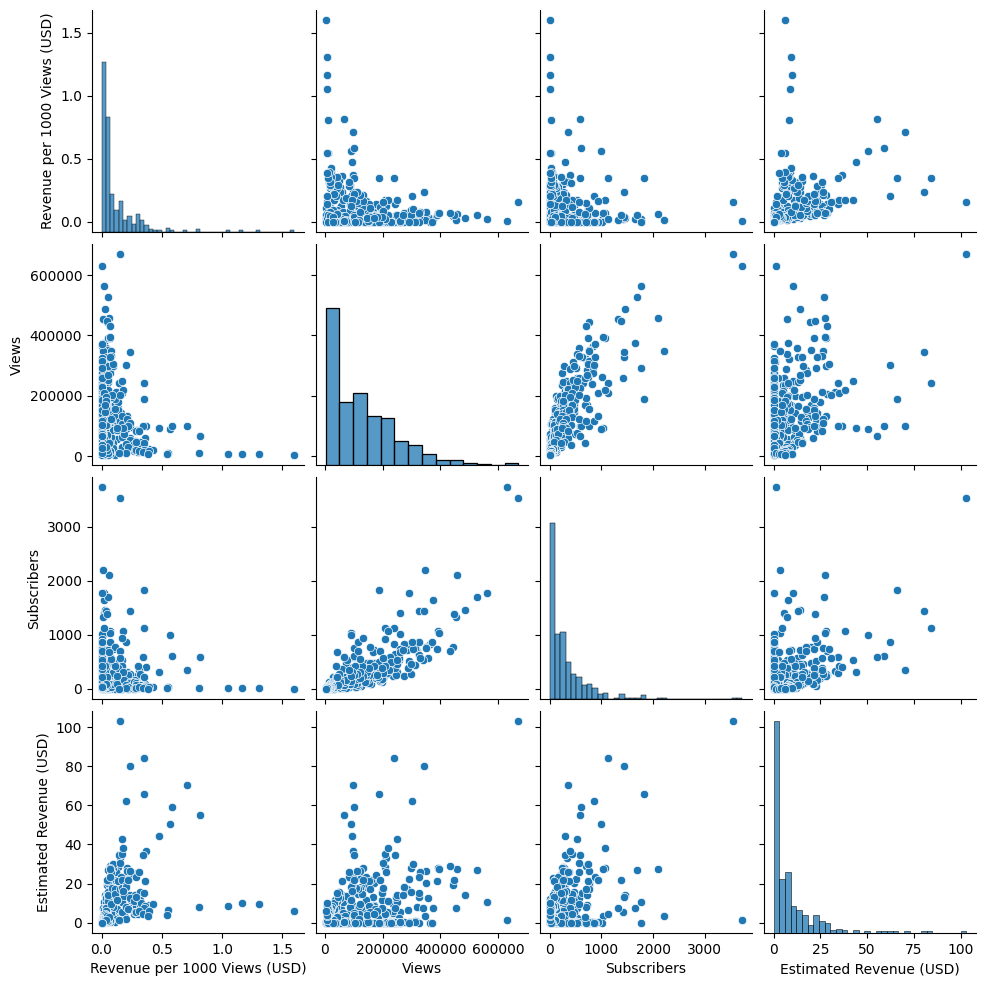

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(data[['Revenue per 1000 Views (USD)', 'Views', 'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

##Correlation Heatmap:

In [ ]:
plt.figure(figsize=(120, 80))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="rainbow")
plt.title("Correlation Heatmap")
plt.show()

##Top Performers by Revenue:

In [ ]:
top_videos = data.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


#5. Feature Engineering

In [ ]:
# Create revenue per view
data['Revenue per View'] = data['Estimated Revenue (USD)'] /data['Views']
# Create engagement rate
data['Engagement Rate'] = (data['Likes'] + data['Shares'] +data['New Comments']) / data['Views'] * 100

#6. Data Visualization
##Revenue Distribution:

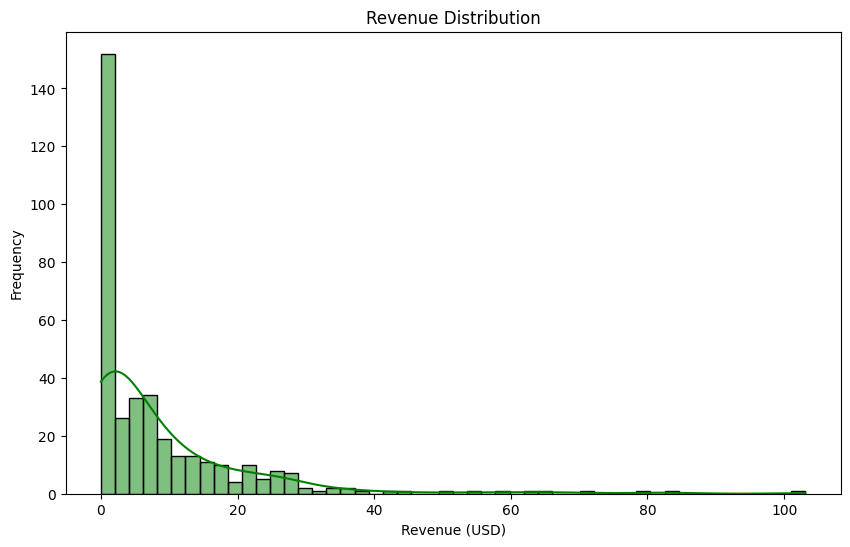

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

##Revenue vs Views:

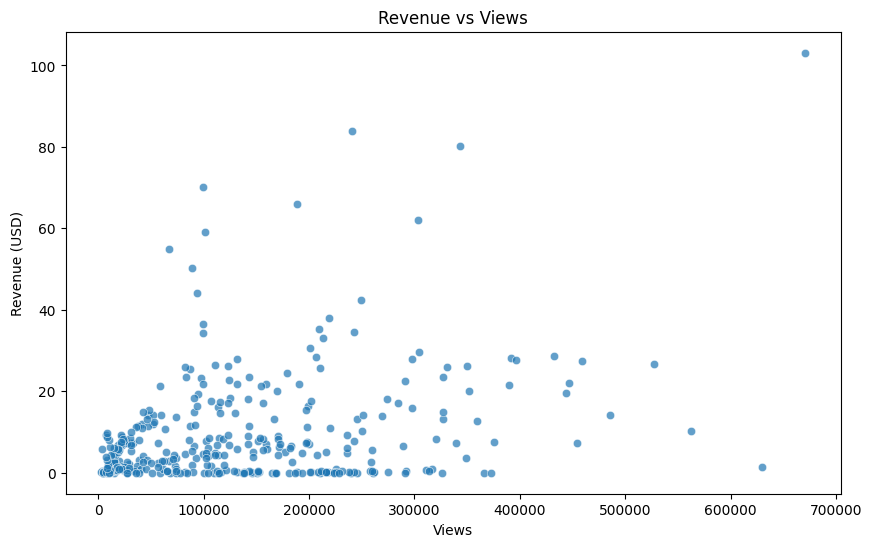

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Views'], y=data['Estimated Revenue (USD)'], alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

#7. Predictive Model: Estimate Revenue
##Prepare Data:

In [ ]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'
X = data[features]
y = data[target]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

##Train Random Forest Regressor:

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

##Evaluate the Model:

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.70
R-squared: 0.13


##Predictive Modeling
Given the richness of this dataset, let's attempt to predict the 'Estimated Revenue
(USD)' using other features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Define features and target variable
X = numeric_data.drop(columns=['Estimated Revenue (USD)'])
y = numeric_data['Estimated Revenue (USD)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.45593992214488205)

#8. Insights and Recommendations
##Use visualizations and feature importance to derive insights:

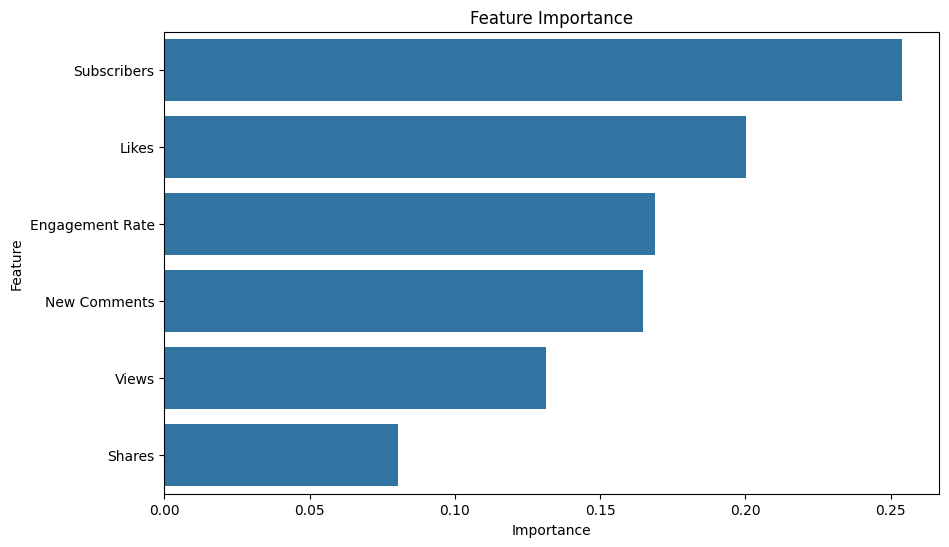

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features,'Importance': importances})
feature_importance_df =feature_importance_df.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

#9. Deployment and Presentation

● Summarize findings:

○ Highlight top revenue drivers (e.g., views, engagement rate).

○ Identify underperforming areas (e.g., low CPM or low engagement).

##Export model:

In [ ]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']